In [105]:
import sklearn
from sklearn.datasets import load_digits

import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [132]:
digits = load_digits()
digits.images.shape #1797 samples of 8x8 pixel matrices

(1797, 8, 8)

In [133]:
#We need 2-D [n_samples,n_features] representation
# 8x8 to 1x64
X = digits.data
X.shape

(1797, 64)

In [134]:
#Let's get the target
y = digits.target
y.shape

(1797,)

In [135]:
#Let's try a generative, discriminative, and non-parametric classifiers
#First, generative
#slipt data
from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=0)

In [12]:
#train data
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(Xtrain, ytrain)

GaussianNB(priors=None, var_smoothing=1e-09)

In [13]:
#test data
y_model = model.predict(Xtest)

In [14]:
#get accuracy
from sklearn.metrics import accuracy_score
accuracy_score(ytest,y_model)

0.8333333333333334

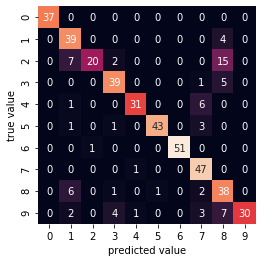

In [18]:
#where do we go wrong?
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(ytest,y_model)

sns.heatmap(mat,square=True, annot=True, cbar=False)
plt.xlabel('predicted value')
plt.ylabel('true value');

In [78]:
#Lets try discriminate classifier
#Logistic Regression
from sklearn.linear_model import LogisticRegression

In [79]:
logreg = LogisticRegression(C=1e5, solver='lbfgs', multi_class='multinomial')

In [80]:
logreg.fit(Xtrain, ytrain)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


LogisticRegression(C=100000.0, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='multinomial', n_jobs=None,
                   penalty='l2', random_state=None, solver='lbfgs', tol=0.0001,
                   verbose=0, warm_start=False)

In [81]:
#test data
y_model = logreg.predict(Xtest)

In [82]:
accuracy_score(ytest,y_model)

0.9511111111111111

In [84]:
#Pretty good, lets try cross val
from sklearn.model_selection import cross_val_score

cross_val = cross_val_score(logreg, X, y, cv=10)
cross_val

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", Convergenc

array([0.91351351, 0.96174863, 0.87292818, 0.94444444, 0.94972067,
       0.97206704, 0.96648045, 0.93258427, 0.89265537, 0.9375    ])

In [85]:
cross_val.mean()

0.9343642561952461

In [86]:
#What if we leave one out?
from sklearn.model_selection import LeaveOneOut
scores = cross_val_score(model, X, y, cv=LeaveOneOut())
scores.mean()

0.9799666110183639

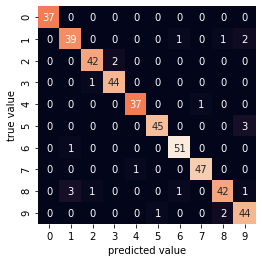

In [87]:
#Where do we go wrong?
mat = confusion_matrix(ytest,y_model)

sns.heatmap(mat,square=True, annot=True, cbar=False)
plt.xlabel('predicted value')
plt.ylabel('true value');

In [88]:
#What is the overall performance of the model?

from sklearn.metrics import classification_report

targets = [ str(class_item) for class_item in list(set(list(y))) ]
class_rep = classification_report(ytest, y_model, target_names=targets )
print(class_rep)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       0.91      0.91      0.91        43
           2       0.95      0.95      0.95        44
           3       0.96      0.98      0.97        45
           4       0.97      0.97      0.97        38
           5       0.98      0.94      0.96        48
           6       0.96      0.98      0.97        52
           7       0.98      0.98      0.98        48
           8       0.93      0.88      0.90        48
           9       0.88      0.94      0.91        47

    accuracy                           0.95       450
   macro avg       0.95      0.95      0.95       450
weighted avg       0.95      0.95      0.95       450



In [41]:
#SVM
from sklearn.svm import SVC

model = SVC(kernel='linear', C=1E10)

In [42]:
model.fit(Xtrain,ytrain)

SVC(C=10000000000.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [43]:
model.support_vectors_

array([[ 0.,  0.,  2., ...,  6.,  0.,  0.],
       [ 0.,  0.,  0., ...,  8.,  0.,  0.],
       [ 0.,  0., 10., ..., 10.,  0.,  0.],
       ...,
       [ 0.,  0.,  0., ...,  7.,  0.,  0.],
       [ 0.,  0.,  9., ..., 13.,  3.,  0.],
       [ 0.,  0.,  7., ...,  5.,  0.,  0.]])

In [44]:
#test data
y_model = model.predict(Xtest)

In [45]:
accuracy_score(ytest,y_model)

0.9711111111111111

In [49]:
#Pretty good, lets try cross val
from sklearn.model_selection import cross_val_score

cross_val = cross_val_score(model, X, y, cv=10)
cross_val

array([0.93513514, 0.99453552, 0.9281768 , 0.96111111, 0.96089385,
       0.98882682, 0.96648045, 0.97752809, 0.93220339, 0.96590909])

In [51]:
cross_val.mean()

0.9610800248897716

In [54]:
#What if we leave one out?
from sklearn.model_selection import LeaveOneOut
scores = cross_val_score(model, X, y, cv=LeaveOneOut())
scores

array([1., 1., 1., ..., 1., 1., 1.])

In [55]:
scores.mean()

0.9799666110183639

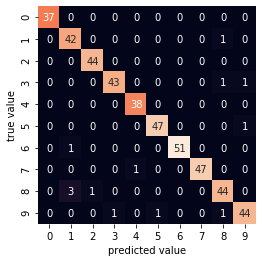

In [40]:
#Where do we go wrong?
mat = confusion_matrix(ytest,y_model)

sns.heatmap(mat,square=True, annot=True, cbar=False)
plt.xlabel('predicted value')
plt.ylabel('true value');

In [70]:
#What is the overall performance of the model?

from sklearn.metrics import classification_report

targets = [ str(class_item) for class_item in list(set(list(y))) ]
class_rep = classification_report(ytest, y_model, target_names=targets )
print(class_rep)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       0.91      0.98      0.94        43
           2       0.98      1.00      0.99        44
           3       0.98      0.96      0.97        45
           4       0.97      1.00      0.99        38
           5       0.98      0.98      0.98        48
           6       1.00      0.98      0.99        52
           7       1.00      0.98      0.99        48
           8       0.94      0.92      0.93        48
           9       0.96      0.94      0.95        47

    accuracy                           0.97       450
   macro avg       0.97      0.97      0.97       450
weighted avg       0.97      0.97      0.97       450



In [90]:
#Last discriminate
#perceptron
from sklearn.linear_model import Perceptron

model = Perceptron(tol=1e-3, random_state=0)
model.fit(Xtrain, ytrain) 

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
           fit_intercept=True, max_iter=1000, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=0, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)

In [91]:
y_model = model.predict(Xtest)

In [92]:
accuracy_score(ytest,y_model)

0.9266666666666666

In [93]:
#What is the overall performance of the model?

from sklearn.metrics import classification_report

targets = [ str(class_item) for class_item in list(set(list(y))) ]
class_rep = classification_report(ytest, y_model, target_names=targets )
print(class_rep)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       0.94      0.74      0.83        43
           2       0.95      0.91      0.93        44
           3       0.85      0.98      0.91        45
           4       0.88      1.00      0.94        38
           5       0.98      0.96      0.97        48
           6       0.84      1.00      0.91        52
           7       1.00      0.94      0.97        48
           8       1.00      0.79      0.88        48
           9       0.90      0.96      0.93        47

    accuracy                           0.93       450
   macro avg       0.93      0.93      0.93       450
weighted avg       0.93      0.93      0.93       450



In [169]:
#Non-parametric model
import xgboost as xgb
from xgboost import XGBClassifier

In [170]:
# xgb_model = xgb.XGBRegressor(objective="reg:squarederror", random_state=42)
xgb_model = XGBClassifier()

In [173]:
xgb_model.fit(Xtrain, ytrain)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [176]:
y_model = xgb_model.predict(Xtest)

In [177]:
accuracy_score(ytest,y_model)

0.9488888888888889

In [178]:
#What is the overall performance of the model?

from sklearn.metrics import classification_report

targets = [ str(class_item) for class_item in list(set(list(y))) ]
class_rep = classification_report(ytest, y_model, target_names=targets )
print(class_rep)

              precision    recall  f1-score   support

           0       0.95      0.97      0.96        37
           1       0.95      0.95      0.95        43
           2       0.95      0.89      0.92        44
           3       0.98      0.93      0.95        45
           4       0.97      0.97      0.97        38
           5       0.94      0.98      0.96        48
           6       1.00      0.96      0.98        52
           7       0.96      0.98      0.97        48
           8       0.92      0.92      0.92        48
           9       0.88      0.94      0.91        47

    accuracy                           0.95       450
   macro avg       0.95      0.95      0.95       450
weighted avg       0.95      0.95      0.95       450

